In [1]:
import pandas as pd
import numpy as np
import setup_jwlab
from jwlab.constants import cleaned_data_filepath

from jwlab.cluster_analysis_perm import cluster_analysis_procedure
from jwlab.ml_prep_perm import prep_ml, slide_df, init, load_ml_data, get_bad_trials, map_participants,average_trials_and_participants
from jwlab.bad_trials import get_bad_trials, get_left_trial_each_word


from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, RepeatedKFold
from scipy import stats
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt


In [4]:
len(X[0][0][0])

6000

In [15]:
X[0][0][0]

array([-6.09808921, -9.87080036, -4.32243767, ..., -3.21982236,
       -6.1077614 , -4.49625209])

In [2]:
age_group=9
useRandomizedLabel = False
averaging = "no_averaging"
sliding_window_config = [-200, 1000, [100], 10]
X, y, good_trial_count, num_win = prep_ml(age_group, useRandomizedLabel, averaging, sliding_window_config, downsample_num=1000)
X

[[array([[-18.8870351,   7.6165289,   8.3354294, ...,  -3.8421956,
            1.067294 ,  -1.7688872],
         [ -1.9252569,  -6.9816244,  -6.2532404, ...,  -2.2299502,
           -2.7068894,  -1.8424388],
         [  2.6218129,  10.086102 ,  10.7780672, ...,   5.7441017,
            4.5902972,   6.5098892],
         ...,
         [ 11.6016315, -14.0103642, -33.7297837, ...,  -0.7504172,
           15.2710624,  -5.7174244],
         [ 27.6140959,  -7.5659586, -47.4967299, ...,   1.7348819,
            0.199505 ,   1.0162881],
         [-44.5039571, -16.7114759,  -8.8153266, ...,   9.8183439,
           10.769071 ,   4.5128048]]),
  array([[ -8.7449683,  10.933356 ,   8.7748727, ...,  -2.3634387,
           -1.1439044,  -0.8573344],
         [  0.562831 , -12.3875388, -13.9205098, ...,  -1.3172279,
            1.2792935,  -0.7955772],
         [ 11.2302205,   2.9222513,   6.5192963, ...,   2.6184658,
            0.4837704,   4.1260992],
         ...,
         [  9.8780484, -62.0324809

In [3]:
len(X[0][0][1])

6000

In [4]:
X[0][0][1]

array([-1.9252569, -6.9816244, -6.2532404, ..., -2.2299502, -2.7068894,
       -1.8424388])

In [5]:
y[0][1]

array([ 1., 10.,  7.,  8.,  6., 13.,  5.,  8., 15.,  6., 12.,  4., 10.,
        3.,  6., 12.,  4., 14.,  1.,  9.,  7., 11.,  4., 13.,  5., 10.,
        6., 15., 11.,  1.,  9.,  0.,  7.,  8.,  2.,  8.,  2., 13.,  6.,
        8.,  1.,  2.,  0.,  4., 11., 13.,  2.,  8.,  6.,  6., 12.,  3.,
        1.,  8.,  7., 11.,  1., 12.,  6., 10.,  3.,  5., 11.,  5., 13.,
        4., 15.,  7., 13.,  3.,  9.,  2.,  9.,  4., 14., 15.,  6., 10.,
        7.,  8.,  1., 13.,  0.,  6.,  2., 11.,  3., 10.,  0.,  4., 15.,
        5., 15.,  2.,  9.,  6.,  7., 12., 10.,  1.,  7., 12.,  6.,  2.,
        0.,  5., 13., 12.,  2.,  5., 10.,  3.,  8.,  5.,  1., 12.,  2.,
        9.,  5.,  7., 13.,  6.,  9.,  0., 12., 14., 14., 11., 15., 13.,
        2.,  7., 10.,  6., 13.,  0.,  8.,  6., 12.,  4., 11.,  4., 12.,
        6.])

In [6]:
age_group=9
useRandomizedLabel = False
averaging = "permutation"
sliding_window_config = [-200, 1000, [100], 10]
X_comp, y_comp, good_trial_count, num_win = prep_ml(age_group, useRandomizedLabel, averaging, sliding_window_config, downsample_num=1000)

In [17]:
X_comp[0][0][5]

array([ 2.1706465 , -2.35060335, -0.32723798, ..., -3.177075  ,
       -3.82519677, -4.61909948])

In [3]:
# Argument 1: 9 or 11 (month olds)
# Argument 2: Boolean, True to randomize the labels, False otherwise
# Argument 3: averaging, could be: no_averaging, average_trials, average_trials_and_participants, permutation
# Argument 4: sliding_window_config[start_time, end_time, window_lengths[], step_length]
# Argument 5: cross_val_config[num_fold, num_fold iterations, number of sample iterations]

#cluster_analysis_procedure(9, False, "permutation", [-200, 1000, [10, 20, 40, 60], 10], [3, 5])

Valid positive windows are: [6, 48, 53, 54, 55, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 109, 110]

Valid negative windows are: [0, 1, 2, 3, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 47, 51, 98, 100, 101, 103, 106, 107]

Positive clusters are: [[330, 340, 350], [390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750]]

Negative clusters are: [[-200, -190, -180, -170], [-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180]]

Positive tmass values are: [0, 11.441434206257316, 378.4435295783736]

Negative tmass values are: [0, -28.56413293068614, -253.93152185532398]

The max positiv

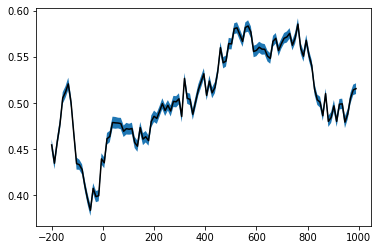

In [2]:
result = cluster_analysis_procedure(11, False, "permutation", [-200, 1000, [100], 10], [3, 15, 10])

Valid positive windows are: [64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 89, 93, 94, 95, 96, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110]

Valid negative windows are: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 34, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 92]

Positive clusters are: [[440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650], [730, 740, 750, 760], [800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900]]

Negative clusters are: [[-200, -190, -180, -170, -160, -150, -140, -130, -120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80], [180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420]]

Positive tmass values are: [0, 

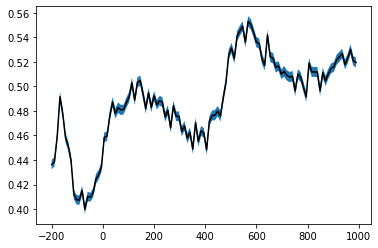

In [5]:
result = cluster_analysis_procedure(9, False, "permutation", [-200, 1000, [100], 10], [3, 15, 20])

In [25]:
import statistics
negsum = 0
negsum += stats.ttest_1samp(result[0][15], .5).statistic
negsum += stats.ttest_1samp(result[0][16], .5).statistic
negsum += stats.ttest_1samp(result[0][17], .5).statistic
negsum += stats.ttest_1samp(result[0][18], .5).statistic
negsum += stats.ttest_1samp(result[0][19], .5).statistic

In [26]:
negsum

-87.39154049028781

In [6]:
results = cluster_analysis_procedure(9, False, "average_trials_and_participants", [-200, 1000, [100], 10], [1, 1, 20])

KeyboardInterrupt: 

In [5]:
results

{0: {0: [0.5,
   0.625,
   0.625,
   0.4375,
   0.4375,
   0.6875,
   0.5,
   0.5625,
   0.375,
   0.5,
   0.4375,
   0.5625,
   0.375,
   0.375,
   0.4375,
   0.5,
   0.375,
   0.4375,
   0.375,
   0.625],
  1: [0.625,
   0.625,
   0.625,
   0.3125,
   0.5625,
   0.5625,
   0.5,
   0.5625,
   0.3125,
   0.5,
   0.4375,
   0.5625,
   0.375,
   0.5,
   0.4375,
   0.5,
   0.5,
   0.375,
   0.5,
   0.625],
  2: [0.625,
   0.625,
   0.625,
   0.3125,
   0.5625,
   0.5625,
   0.4375,
   0.5625,
   0.3125,
   0.5,
   0.4375,
   0.5,
   0.5625,
   0.5,
   0.4375,
   0.5625,
   0.5,
   0.375,
   0.5,
   0.5625],
  3: [0.5625,
   0.5625,
   0.6875,
   0.375,
   0.5,
   0.5625,
   0.3125,
   0.5625,
   0.3125,
   0.5625,
   0.4375,
   0.375,
   0.625,
   0.4375,
   0.4375,
   0.5,
   0.5625,
   0.375,
   0.5,
   0.5],
  4: [0.5625,
   0.5,
   0.75,
   0.4375,
   0.5625,
   0.5625,
   0.25,
   0.5625,
   0.375,
   0.5625,
   0.4375,
   0.4375,
   0.625,
   0.5,
   0.4375,
   0.5,
   0.5,
   0.5,


In [ ]:
num_win= 120

pvalues_pos = []
pvalues_neg = []
tvalues_pos = []
tvalues_neg = []
for i in range(len(results)):
    for j in range(num_win):
        # change the second argument below for comparison
        istat = stats.ttest_1samp(results[i][j], .5)
        pvalues_pos += [istat.pvalue] if istat.statistic > 0 else [1]
        pvalues_neg += [istat.pvalue] if istat.statistic < 0 else [1]
        # removed just so that we can get the negative value from the pre window
        tvalues_pos += [istat.statistic] if istat.statistic > 0 else [0]
        tvalues_neg += [istat.statistic] if istat.statistic < 0 else [0]

In [2]:
# For null distribution
# MAKE SURE YOU TURN OFF PRINT FUNCTION

itr = 50 
arrTmass = []

for i in range(itr):
    tmass = cluster_analysis_procedure(11, True, "permutation", [-200, 1000, [10], 10], [3, 15, 20])
    arrTmass.append(round(tmass, 4))
    print(i)
print(arrTmass)

549.4334729161642
0


KeyboardInterrupt: 

In [ ]:


plt.hist(arrTmass, bins = 20)
plt.show()